In [81]:
%pylab inline
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


In [82]:
class Linear(object):
    def __init__(self, n_in, n_out):
        self.W = np.random.randn(n_out, n_in)
        self.b = np.random.randn(n_out)
        
        self.output = np.zeros(n_out)
        
        self.gradInput = np.zeros(n_in)
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        self.output = np.dot(self.W, input) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.dot(self.W.T, gradOutput)
        return self.gradInput
    
    def updateGradWeight(self, input, gradOutput):
        self.gradW = np.outer(gradOutput, input)
        self.gradb = gradOutput
        return (self.gradW, self.gradb)

In [83]:
class Sigmoid(object):
    def __init__(self, n_in):
        self.output = np.zeros(n_in)
        self.gradInput = np.zeros(n_in)
    
    def updateOutput(self, input):
        self.output = 1.0 / (1.0 + np.exp(-input))
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.output * (1 - self.output)
        return self.gradInput

In [84]:
class MSELoss(object):
    def __init__(self, n_in):
        self.output = 0.0
        self.gradInput = np.zeros(n_in)
        
    def updateOutput(self, input, target):
        diff = input - target
        self.output = np.dot(diff, diff) / diff.shape[0]
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = (2.0 / input.shape[0]) * (input - target)
        return self.gradInput

In [85]:
class Classifier(object):
    def __init__(self, n_in):
        self.linear = Linear(n_in, 5)
        self.sigmoid = Sigmoid(5)
        self.loss = MSELoss(1)
        self.linear2 = Linear( 5, 1 )
        self.sigmoid2 = Sigmoid( 1 )
        
    def forward(self, input, target = None):
        out1 = self.linear.updateOutput(input)
        out2 = self.sigmoid.updateOutput( out1 )
        out3 = self.linear2.updateOutput( out2 )
        out4 = self.sigmoid2.updateOutput( out3 )
        if target != None:
            self.loss.updateOutput(out4, target)
        return out4
    
    def backward(self, input, target):
        # Assumes forward has already been called with input
        back1 = self.loss.updateGradInput(self.sigmoid2.output, target)
        back2 = self.sigmoid2.updateGradInput(self.linear2.output, back1)
        back3 = self.linear2.updateGradInput( self.sigmoid.output, back2 )
        back4 = self.linear2.updateGradWeight( self.sigmoid.output, back2 )
        back5 = self.sigmoid.updateGradInput( self.linear.output, back3 )
        back6 = self.linear.updateGradInput(input, back5)
        grads = self.linear.updateGradWeight(input, back5)
        return grads
    
    def predict(self, input):
        out = self.forward(input)
        if out <= 0.5:
            return 0
        else:
            return 1

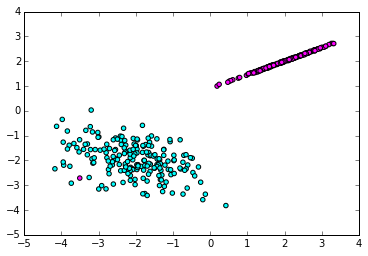

In [86]:
(easy_x, easy_y) = datasets.make_classification(n_samples=400, n_features = 2, n_informative = 2,
                             n_redundant = 0, n_repeated = 0, n_clusters_per_class=1, class_sep=2)
scatter(easy_x[:,0], easy_x[:,1], c = easy_y, cmap = 'cool')

In [87]:
classifier = Classifier(2)

[[ 0.01674294 -1.37045106]
 [ 0.81882886 -0.22680936]
 [ 0.20134839  0.42384677]
 [ 0.77028851  0.30389291]
 [ 0.65738935 -0.46674489]] [ 0.73399197 -1.46765031  0.23204864 -1.51340052 -0.29496588]


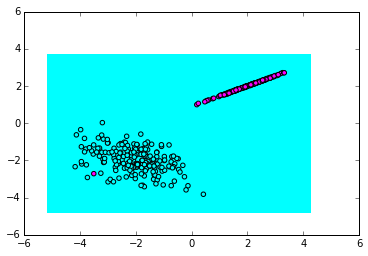

In [88]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(classifier.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

print classifier.linear.W, classifier.linear.b

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')

In [93]:
# training
for i in range(10000):
    for j in range(easy_x.shape[0]):
        err = classifier.forward(easy_x[j], easy_y[j])
        grads = classifier.backward(easy_x[j], easy_y[j])
        
        classifier.linear.W -= 1e-3 * grads[0]
        classifier.linear.b -= 1e-3 * grads[1]

[[-1.46472214 -3.38637163]
 [ 2.73063999  2.5056973 ]
 [-2.12385896 -2.53754791]
 [ 2.22358977  2.25098839]
 [ 2.09718936  1.28535276]] [-0.58823031  0.38245495 -1.57114299 -0.24585076  0.75225016]


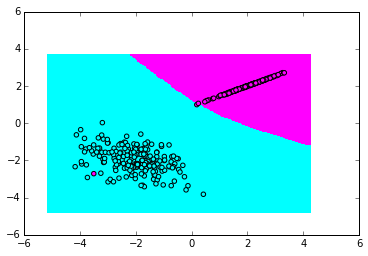

In [94]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(classifier.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

print classifier.linear.W, classifier.linear.b

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')